# Исследование сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

1. Без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

2. С подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

# Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv

- **user_id** - уникальный идентификатор пользователя
- **name** - имя пользователя
- **age** - возраст
- **city** - город
- **subscription_type** - тип подписки (free, ultra)


Поездки — rides_go.csv

- **user_id** - уникальный идентификатор пользователя
- **distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- **duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- **date** - дата совершения поездки


Подписки — subscriptions_go.csv

- **subscription_type** - тип подписки
- **minute_price** - стоимость одной минуты поездки по данной подписке
- **start_ride_price** - стоимость начала поездки
- **subscription_fee** - стоимость ежемесячного платежа


In [1]:
#импорт необходимых библиотек
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from scipy import stats as st

from scipy.stats import binom

from math import sqrt

#### Шаг 1. Загрузка данных

Датасет **users_go**: загрузка, первые 20 строк, основная информация

In [2]:
#загрузка датасета users_go
data_users = pd.read_csv('users_go.csv')

#первые 20 строк
data_users.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
#общая информация о датасете
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Данные в таблице отображаются достаточно корректно.

Явных дубликатов среди первых 20 строк нет. 

Пропусков нет.

Датасет **rides_go**: загрузка, первые 20 строк, основная информация

In [4]:
#загрузка датасета rides_go
data_rides = pd.read_csv('rides_go.csv')

#первые 20 строк
data_rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
#общая информация о датасете
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Данные в таблице отображаются достаточно корректно.

Явных дубликатов среди первых 20 строк нет. 

Пропусков нет.

На этапе предобработки необходимо привести столбец **date** к типу datetime.

Датасет **subscriptions_go**: загрузка, первые 20 строк, основная информация

In [6]:
#загрузка датасета subscriptions_go
data_subs = pd.read_csv('subscriptions_go.csv')

#первые 20 строк
data_subs.head(20)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
#общая информация о датасете
data_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Данные в таблице отображаются достаточно корректно.

Явных дубликатов среди первых 20 строк нет. 

Пропусков нет.

#### Шаг 2. Предобработка данных

##### Обработка столбцов датафрейма data_rides

In [8]:
#приведение столбца date к типу datetime
data_rides['date'] = pd.to_datetime(
    data_rides['date'], format='%Y-%m-%d'
    )

#проверка
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создание нового столбца с номером месяца на основе столбца **date**

In [9]:
#создание столбца
data_rides.insert(
    loc=data_rides.columns.get_loc('date')+1,
    column = 'month',
    value=pd.Series(data=data_rides['date'].dt.month,
      dtype='int')
    )

#вывод датафрейма с сновым столбцом
data_rides.head(20)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


Проверим, за какой период есть данные в датасете.

In [10]:
data_rides['date'].dt.year.unique()

array([2021], dtype=int64)

В датасете данные только за один 2021 год, а значит, при вычислении помесячной выручки в п. 5.2 год можно не учитывать.

##### Проверка на наличие дубликатов

Наличие явных дубликатов в датафреймах.

In [11]:
print(
    f'Дубликатов в датафрейме data_users: {data_users.duplicated().sum()}',
    '\n', '\n',
    f'Дубликатов в датафрейме data_rides: {data_rides.duplicated().sum()}',
    '\n', '\n',
    f'Дубликатов в датафрейме data_subs: {data_subs.duplicated().sum()}'
)

Дубликатов в датафрейме data_users: 31 
 
 Дубликатов в датафрейме data_rides: 0 
 
 Дубликатов в датафрейме data_subs: 0


Удаление дублирующихся строк в датафрейме **data_users**.

In [12]:
data_users = data_users.drop_duplicates()

Неявные дубликаты возможны в столбце **city** датафрейма **data_users**. Проверим значения столбца.

In [13]:
data_users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

Дубликатов нет.

Проверим на наличие явно ошибочных значений следующие столбцы.

Для датафрейма **data_users**:
 - **name**
 - **age**
 - **subscription_type**
 
Для этого выведем уникальные значения каждого столбца.

In [14]:
data_users['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

In [15]:
data_users['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43], dtype=int64)

In [16]:
data_users['subscription_type'].sort_values().unique()

array(['free', 'ultra'], dtype=object)

Явно ошибочных значений нет.

##### Вывод по результатам предобработки

В датасете **users_go** присутствует небольшое количество дубликатов строк: 31, в других датасетах их нет. Дубликаты удалены.

Неявных дубликатов в столбцах, где они могут быть, не замечено. 

Пропусков в датасетах нет.

Столбец **date** в датафрейме **data_rides** приведён к типу данных pandas, в датафрейм добавлен столбец с номером месяца для каждой поездки. Размечать значения в этом столбце или добавлять столбец с идентификатором года не нужно, потому что данны есть только за один 2021 год.

#### Шаг 3. Исследовательский анализ данных

Описание и визуализация общей информаци о пользователях и поездках.

#####  Частота встречаемости городов

Список значений столбца и их количество.

In [17]:
data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Диаграмма 

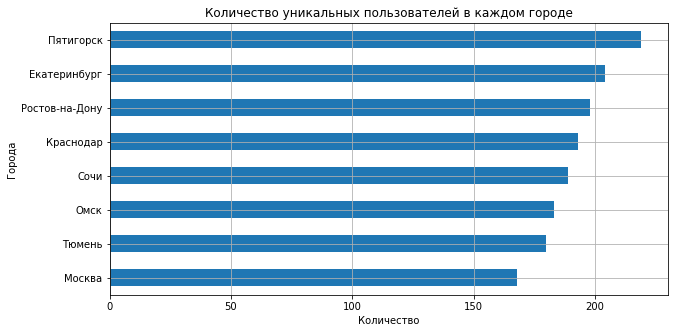

In [18]:
data_users.groupby('city')['user_id'].count().sort_values().plot(
    kind='barh',
    title='Количество уникальных пользователей в каждом городе',
    figsize=(10,5),
    grid=True,
    legend=False, 
    );
plt.ylabel('Города');
plt.xlabel('Количество');

Наибольшее число пользующихся сервисом в Пятигорске, наименьшее - в Москве.

Для визуализации частоты поездок в каждом городе понадобится добавить в датафрейм **data_users** столбец с количеством поездок для каждого пользователя.

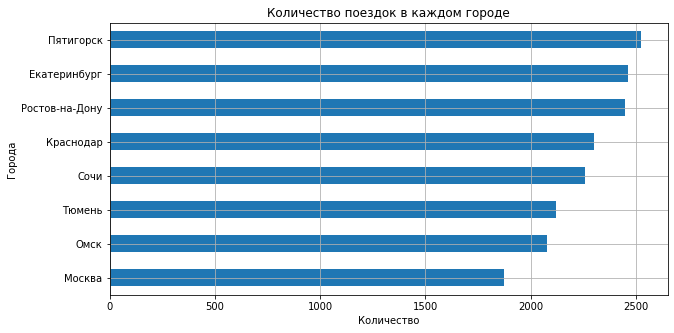

In [19]:
#создание таблицы с количеством поездок для каждого пользователя
pivot = (data_rides
         .sort_values(by='user_id').
         pivot_table(
            index='user_id', 
            values='distance', 
            aggfunc='count')
        )

#создание столбца user_id для помледующего объединения по нему
pivot['user_id'] = pivot.index

#переименование индекса таблицы
pivot.index.names=['index']

#создание временной копии data_users и добавление в неё нужного столбца 
data_users_temp = data_users.merge(pivot, on='user_id')

#построение диаграммы
data_users_temp.groupby('city')['distance'].sum().sort_values().plot(
    kind='barh',
    title='Количество поездок в каждом городе',
    figsize=(10,5),
    grid=True,
    legend=False, 
    );
plt.ylabel('Города');
plt.xlabel('Количество');

Список количества поездок на самокатах по городам:

In [20]:
data_users_temp.groupby('city')['distance'].sum().sort_values(ascending=False)

city
Пятигорск         2524
Екатеринбург      2461
Ростов-на-Дону    2450
Краснодар         2301
Сочи              2259
Тюмень            2121
Омск              2077
Москва            1875
Name: distance, dtype: int64

Чаще всего пользуются самокатами в Пятигорске, реже всего - в Москве. Разница между городами с наибольшей и наименьшей популярностью сервиса находится в пределах 23-26%. Наибольшее число пользователей в городах в целом совпадает с наибольшим числом поездок, за исключением Омска и Тюмени, но разница между этими двумя городами по обоим показателям невелика.

#####  Соотношение пользователей с подпиской и без подписки

Количество пользователей с разными подписками.

In [21]:
data_users.pivot_table(
        index='subscription_type',
        values='user_id',
        aggfunc='count')

,user_id
subscription_type,
free,835
ultra,699


Диаграмма соотношения.

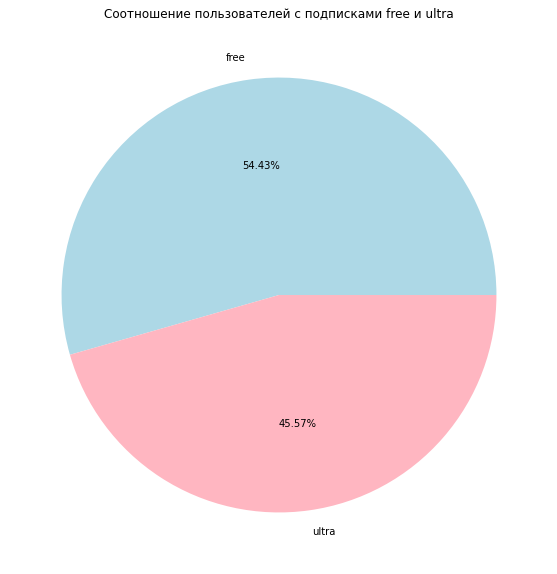

In [22]:
(data_users
    .pivot_table(
        index='subscription_type',
        values='user_id',
        aggfunc='count')
    .plot(
        kind='pie',
        y='user_id',
        title='Соотношение пользователей с подписками free и ultra',
        label='',
        autopct='%0.2f%%',
        colors=['lightblue', 'lightpink'],
        figsize=(10,10),
        legend=False
    )
);

Пользователей с подпиской ultra 45,7%, пользователей, пользующихся сервисом без подписки 54,43%.

##### Возраст пользователей

Гистограмма распределения пользователей по возрастам.

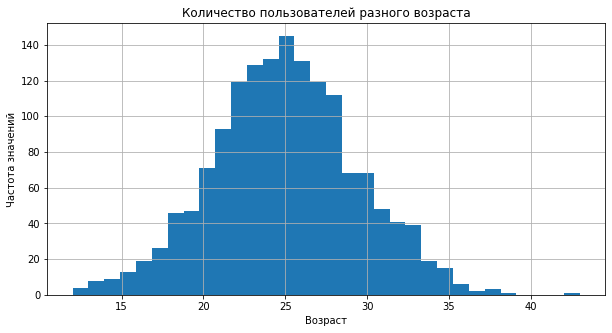

In [23]:
data_users['age'].plot(
    kind='hist',
    bins=32,
    grid=True,
    figsize=(10,5),
    title='Количество пользователей разного возраста'
);

plt.xlabel('Возраст');
plt.ylabel('Частота значений');

Количество пользователей разного возраста.

In [24]:
data_users.pivot_table(
        index='age',
        values='user_id',
        aggfunc='count')

,user_id
age,
12,4
13,8
14,9
15,13
16,19
17,26
18,46
19,47
20,71


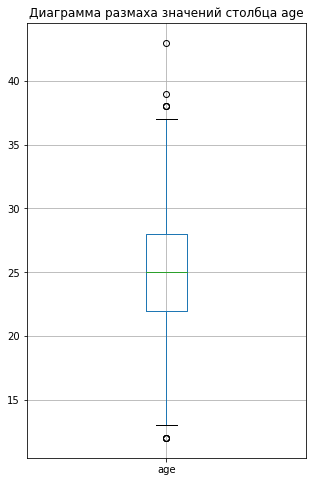

In [25]:
#диаграмма размаха значений
data_users.boxplot('age', figsize=(5,8));

plt.title('Диаграмма размаха значений столбца age');

Основные характеристики столбца.

In [26]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Основная масса пользователей - в возрасте от 13 до 37 лет. Половина - среди молодёжи 22-28 лет, самым младшим 12 лет, самому старшему 43 года. Распределение количества пользователей по возрастам стремится к нормальному с медианным значением 25 лет. Нет оснований считать маленькие или большие значения аномалиями или ошибками.

##### Расстояние, которое пользователь преодолел за одну поездку

Для общей оценки метрики построим гистограмму значений столбца **distance** датафрейма **data_rides**.

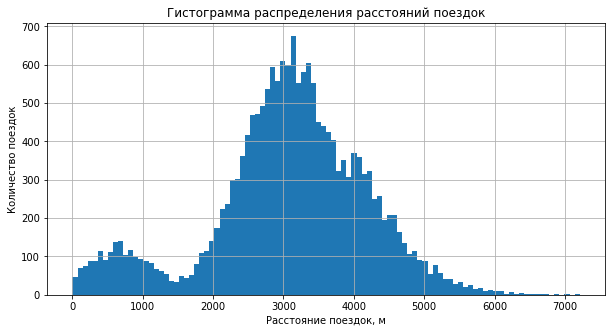

In [27]:
data_rides['distance'].plot(
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10,5),
    title='Гистограмма распределения расстояний поездок'
);

plt.xlabel('Расстояние поездок, м');
plt.ylabel('Количество поездок');

На гистограмме присутствуют два пика: больший около 3100 м, и меньший около 600-700 метров. 

Этому может быть несколько объяснений:

- продолжительность поездок разнится для каких-либо категориий пользователей: в силу возраста, занятости, финансового положения;
- продолжительность поездок связана с размерами городов, в которых проводилось исследование и соответствующей протяжённостью маршрутов, к примеру, в Москве и Екатеринбурге, поскольку там есть метро, большая часть пользователей могут совершать более короткие поездки, чем в других крупных городах;
- поскольку коротких поездок меньше, это могут быть первые попытки начинающих пользователей;
- продолжительность поездок может зависеть от времени года, дня недели (будни или выходные), места жительства пользователей (центр или окраина) и других неизвестных нам факторов.

Аномально большие значения редки, скорее всего это не аномалии, а просто редкие продолжительные поездки фанатов езды на самокате или, к примеру, курьеры, которые используют сервис по работе - такие случаи редки, но ничего невозможного в этом нет. Оснований сомневаться в достоверности этих значений нет.

Для общей оценки метрики построим гистограмму значений столбца duration датафрейма data_rides.

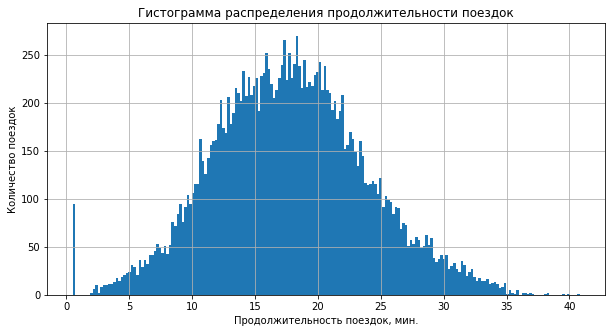

In [28]:
data_rides['duration'].plot(
    kind='hist',
    bins=200,
    grid=True,
    figsize=(10,5),
    title='Гистограмма распределения продолжительности поездок'
);

plt.xlabel('Продолжительность поездок, мин.');
plt.ylabel('Количество поездок');

В целом распределение значений стремится к нормальному с пиком около 17 минут. Чрезвычайно длительные поездки очень редки и аномалиями, скорее всего, не являются. То же самое можно сказать о коротких поездках, за исключением странного выброса в районе единицы.

Изучим эту часть датафрейма.

In [29]:
data_rides.query('duration < 2')['duration'].value_counts()

0.5    95
Name: duration, dtype: int64

95 строк, в которых продолжительность поездки 0,5 минут. Выведем их на экран.

In [30]:
data_rides.query('duration == 0.5').head(20)

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
6860,724,6225.520342,0.5,2021-12-16,12
6883,726,4452.491518,0.5,2021-03-01,3
7018,735,4406.954812,0.5,2021-04-13,4
7160,745,5286.167732,0.5,2021-08-17,8
7364,760,4881.391865,0.5,2021-08-29,8


Можно было бы предположить, к примеру, что полминуты -  это минимально учитываемый промежуток времени в ситуации, когда пользователь передумал совершать поездку сразу после её начала. Однако продолжительность этих поездок противоречит такой версии: в такой ситуации она была бы близка к нулю.

Если есть возможность, необходимо уточнить этот момент у коллег или заказчика на предмет связи с какими-нибудь акциями или спецпредложениями сервиса. В данном случае такой возможности нет.

Единственное логичное предположение: в этой части датафрейма ошибочные данные.

Проверим, не связаны ли эти с конкретными пользователями или датами.

In [31]:
data_rides.query('duration == 0.5')['user_id'].value_counts().sort_values()

1477    1
774     1
1287    1
1421    1
906     1
       ..
1224    2
973     2
1243    2
1007    2
1364    2
Name: user_id, Length: 90, dtype: int64

In [32]:
data_rides.query('duration == 0.5')['date'].value_counts().sort_values()

2021-02-07    1
2021-11-22    1
2021-04-12    1
2021-03-26    1
2021-01-19    1
             ..
2021-07-28    2
2021-01-12    2
2021-11-20    2
2021-06-18    2
2021-08-29    3
Name: date, Length: 82, dtype: int64

Никакой связи нет: ошибки распределены редко и равномерно.

Поскольку таких строк немного (около 0,5%) от общего количества, и заменить их нечем, лучше всего будет от них избавиться. 


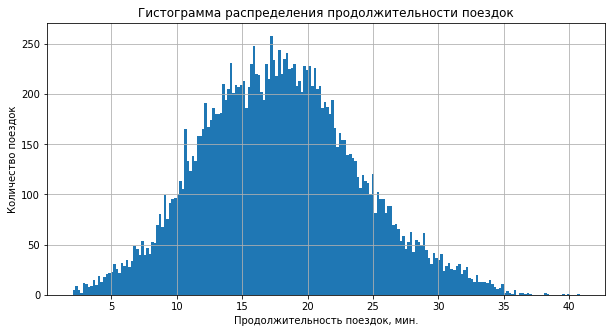

In [33]:
#удаление строк с ошибкой
data_rides = data_rides.query('duration != 0.5')

#гистограмма изменённого столбца
data_rides['duration'].plot(
    kind='hist',
    bins=200,
    grid=True,
    figsize=(10,5),
    title='Гистограмма распределения продолжительности поездок'
);

plt.xlabel('Продолжительность поездок, мин.');
plt.ylabel('Количество поездок');

#### Шаг 4. Объединение данных

##### Объединение данных о пользователях, поездках и подписках в один датафрейм.

In [34]:
#создание переменной для общего датафрейма, 
#добавление в него данных из data_users и data_subs
data_full = data_users.merge(data_subs, on='subscription_type')

#добавление данных из data_rides
data_full = data_full.merge(data_rides, on='user_id')

#вывод первых 20 строк полученного датафрейма
data_full.head(20)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,6,0,199,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,6,0,199,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,6,0,199,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,6,0,199,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,6,0,199,748.690645,15.041884,2021-11-22,11


Основная информация о полученном датафрейме, проверка на пропуски и явные дубликаты.

In [35]:
print(data_full.info(),
      '\n',
      '\n',
      'Количество пропусков:'
      '\n',
      '\n',
      data_full.isna().sum(),
      '\n',
      '\n',
      f'Количество дубликатов: {data_full.duplicated().sum()}'
     )



<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int64         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   minute_price       17973 non-null  int64         
 6   start_ride_price   17973 non-null  int64         
 7   subscription_fee   17973 non-null  int64         
 8   distance           17973 non-null  float64       
 9   duration           17973 non-null  float64       
 10  date               17973 non-null  datetime64[ns]
 11  month              17973 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.7+ MB
None 
 
 Количество пропусков:

Сравним количество строк полученного датафрейма с количеством строк исходных. Поскольку объединение сделано по типу "inner", достаточно сравнить с количеством строк в самом большом из исходных датафреймов - **data_rides**.

In [36]:
data_rides.shape

(17973, 5)

В обоих случаях по 17973 строки.

С датафреймом всё в порядке.

##### Создание из полученного датафрейма двух датафреймов для пользователей с подпиской и без

Датафрейм для пользователей без подписки:

In [37]:
#создание
data_ultra = data_full.query('subscription_type == "ultra"').reset_index(drop=True)

#вывод первых 20 строк
data_ultra.head(20)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,6,0,199,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,6,0,199,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,6,0,199,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,6,0,199,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,6,0,199,748.690645,15.041884,2021-11-22,11


Датафрейм для пользователей без подписки:

In [38]:
#создание
data_free = data_full.query('subscription_type == "free"').reset_index(drop=True)

#вывод первых 20 строк
data_free.head(20)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,700,Айдар,22,Омск,free,8,50,0,2515.690719,14.944286,2021-01-02,1
1,700,Айдар,22,Омск,free,8,50,0,846.932642,16.234663,2021-02-01,2
2,700,Айдар,22,Омск,free,8,50,0,4004.434142,20.016628,2021-02-04,2
3,700,Айдар,22,Омск,free,8,50,0,1205.911290,9.782872,2021-02-10,2
4,700,Айдар,22,Омск,free,8,50,0,3047.379435,17.427673,2021-02-14,2
5,700,Айдар,22,Омск,free,8,50,0,4342.002254,22.368009,2021-02-23,2
6,700,Айдар,22,Омск,free,8,50,0,3798.334905,18.243756,2021-03-03,3
7,700,Айдар,22,Омск,free,8,50,0,2984.551206,15.424899,2021-04-09,4
8,700,Айдар,22,Омск,free,8,50,0,3360.107141,16.765497,2021-06-12,6
9,700,Айдар,22,Омск,free,8,50,0,2567.543847,11.312160,2021-06-23,6


 ##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.
 

Расстояние поездок.

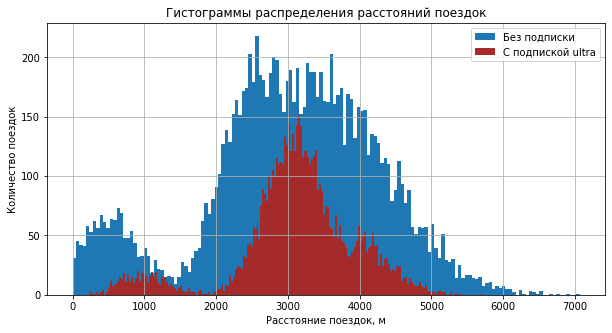

In [39]:
#график для пользователей без подписки
data_free['distance'].plot(
    kind='hist',
    bins=150,
    grid=True,
    figsize=(10,5),
);

#график для пользователей с подпиской
data_ultra['distance'].plot(
    kind='hist',
    bins=200,
    grid=True,
    color='brown',
    figsize=(10,5)
);

plt.xlabel('Расстояние поездок, м')
plt.ylabel('Количество поездок')
plt.legend(['Без подписки', 'С подпиской ultra'])
plt.title('Гистограммы распределения расстояний поездок')
plt.show()

Распределение дальности поездок как для пользователей с подпиской, так и без, имеет по два пика: один около 3100 м, второй для пользователей с подпиской около 1000 м, без подписки около 700 м.

Большое количество коротких поездок (менее 500 м) в сегменте пользователей без подписки может говорить в пользу версии о том, что речь здесь действительно идёт о первых пробных поездках. Для проверки такой гипотезы нужно больше данных.

Продолжительность поездок.

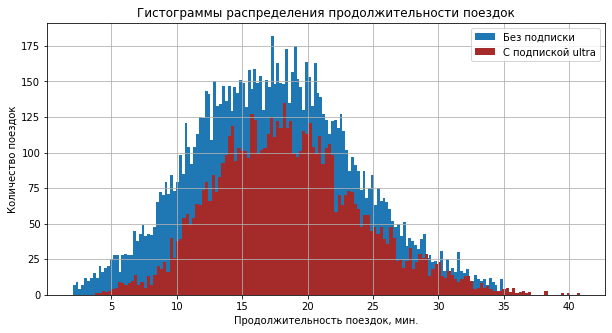

In [40]:
#график для пользователей без подписки
data_free['duration'].plot(
    kind='hist',
    bins=150,
    grid=True,
    figsize=(10,5),
);

#график для пользователей с подпиской
data_ultra['duration'].plot(
    kind='hist',
    bins=150,
    grid=True,
    color='brown',
    figsize=(10,5)
);

plt.xlabel('Продолжительность поездок, мин.')
plt.ylabel('Количество поездок')
plt.legend(['Без подписки', 'С подпиской ultra'])
plt.title('Гистограммы распределения продолжительности поездок')
plt.show()

Распределение продолжительности поездок как для пользователей с подпиской, так и без, близко к нормальному с пиковым значением около 17-18 минут.

#### Шаг 5. Подсчёт выручки

##### Создание датафрейма с агрегированными данными , содержащего суммарное расстояние, количество поездок  и суммарное время для каждого пользователя за каждый месяц.

In [41]:
#округление продолжительности каждой поездки до целых значений минут
data_full['duration'] = np.ceil(data_full['duration'])

#создание датафрейма с помощью сводной таблицы
data_rev = data_full.pivot_table(
    index=['user_id', 'month', 'start_ride_price', 'minute_price', 'subscription_fee', 'subscription_type'], 
    values=['duration', 'name', 'distance'], 
    aggfunc={'duration':'sum', 'name':'count', 'distance':'sum'}).reset_index()

#переименование столбцов
data_rev.rename(columns = {'distance':'distance_month', 'duration':'duration_month', 'name':'rides_month'},
            inplace=True)

#приведение столбцов к типу int, поскольку полученные значения целочисленные
data_rev[[
    'duration_month', 
    'rides_month'
    ]] = data_rev[['duration_month', 
            'rides_month']].astype(int)

##### Добавление столбца с помесячной выручкой, рассчитанной для каждого пользователя.

In [42]:
#добавление столбца
data_rev = data_rev.assign(
    month_revenue = (
        data_rev['start_ride_price'] * data_rev['rides_month'] 
        + data_rev['duration_month'] * data_rev['minute_price'] 
        + data_rev['subscription_fee']
        )
)

#первые 20 строк полученного датафрейма
data_rev.head(20)

,user_id,month,start_ride_price,minute_price,subscription_fee,subscription_type,distance_month,duration_month,rides_month,month_revenue
0,1,1,0,6,199,ultra,7027.511294,42,2,451
1,1,4,0,6,199,ultra,754.159807,7,1,241
2,1,8,0,6,199,ultra,6723.470560,46,2,475
3,1,10,0,6,199,ultra,5809.911100,32,2,391
4,1,11,0,6,199,ultra,7003.499363,56,3,535
5,1,12,0,6,199,ultra,6751.629942,28,2,367
6,2,3,0,6,199,ultra,10187.723006,63,3,577
7,2,4,0,6,199,ultra,6164.381824,40,2,439
8,2,6,0,6,199,ultra,3255.338202,14,1,283
9,2,7,0,6,199,ultra,6780.722964,48,2,487


In [43]:
#беглая проверка на пропуски и дубликаты
print(data_rev.info(),
      '\n',
      '\n',
      'Количество пропусков:'
      '\n',
      '\n',
      data_full.isna().sum(),
      '\n',
      '\n',
      f'Количество дубликатов: {data_full.duplicated().sum()}'
     )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11300 entries, 0 to 11299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11300 non-null  int64  
 1   month              11300 non-null  int64  
 2   start_ride_price   11300 non-null  int64  
 3   minute_price       11300 non-null  int64  
 4   subscription_fee   11300 non-null  int64  
 5   subscription_type  11300 non-null  object 
 6   distance_month     11300 non-null  float64
 7   duration_month     11300 non-null  int32  
 8   rides_month        11300 non-null  int32  
 9   month_revenue      11300 non-null  int64  
dtypes: float64(1), int32(2), int64(6), object(1)
memory usage: 794.7+ KB
None 
 
 Количество пропусков:
 
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
distance             0


Датафрейм **data_rev** готов к работе.

#### Шаг 6. Проверка гипотез

##### Гипотеза о разнице во времени, затраченном пользователями с подпиской и без

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Формулирование гипотез.

В нашем распоряжении две генеральные совокупности, которые можно считать независимыми.

Нулевая гипотеза: средняя продолжительность поездок пользователей без подписки равна средней продолжительности поездок пользователей с подпиской ultra.

Альтернативная гипотеза: средняя продолжительность поездок пользователей с подпиской ultra больше средней продолжительности поездок пользователей без подписки.

Проверка гипотез.

In [44]:

#уровень статистической значимости
alpha = 0.05 

#расчёт и вывод p-value
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

print('p-значение:', results.pvalue, '\n')

#результат
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print(
    '\n'
    'Средняя продолжительность поездок пользователей без подписки: ', round(data_free['duration'].mean(), 2),
    '\n',
    '\n',
    'Средняя продолжительность поездок пользователей с подпиской ultra: ', round(data_ultra['duration'].mean(), 2),
)

p-значение: 4.7044680744539e-28 

Отвергаем нулевую гипотезу

Средняя продолжительность поездок пользователей без подписки:  17.53 
 
 Средняя продолжительность поездок пользователей с подпиской ultra:  18.54


Есть основания полагать, что средняя продолжительность поездок пользователей с подпиской ultra больше средней продолжительности поездок пользователей без подписки, однако результат очень близок к уровню статистической значимости в 5%, а значит, даже при понижении уровня статистической значимости считать, что средняя продолжительность поездок пользователей без подписки не равна средней продолжительности поездок пользователей с подпиской ultra, будет уже нельзя.

Это означает, что решения, принятые на основе результата данного теста, могут быть рискованными.

##### Гипотеза о расстоянии, которое пользователи с подпиской  проезжают за  одну поездку

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Формулирование гипотез.

В нашем распоряжении одна генеральная совокупность.

Нулевая гипотеза: средняя дальность поездки для пользователей с подпиской равна 3130 метров.

Альтернативная гипотеза: средняя дальность поездки для пользователей с подпиской больше 3130 метров.

Проверка гипотез.

In [45]:
#уровень статистической значимости
alpha = 0.05 


#расчёт и вывод p-value
results = st.ttest_1samp(data_ultra['distance'], 3130, alternative='greater')

print('p-значение:', results.pvalue)

#результат
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Нет оснований считать, что средняя дальность поездки для пользователей с подпиской больше 3130 метров. 

Это означает, что в среднем пользователи с подпиской ultra не превышают оптимальное с точки зрения износа самоката расстояние в 3130 м.

##### Гипотеза о разнице значений помесячной выручки для пользователей с подпиской ultra и без

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем помесячная выручка от пользователей без подписки.

Формулирование гипотез.

В нашем распоряжении две генеральные совокупности, нет оснований не считать их независимыми.

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам равна помесячной выручке от пользователей без подписки.

Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем помесячная выручка от пользователей без подписки.

Проверка гипотез.

In [46]:
#уровень статистической значимости
alpha = 0.05 

#расчёт и вывод p-value
results = st.ttest_ind(
    data_rev.query('subscription_type == "ultra"')['month_revenue'], 
    data_rev.query('subscription_type == "free"')['month_revenue'], 
    alternative='greater'
)

print('p-значение:', results.pvalue, '\n')

#результат
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print(
    '\n',
    'Средняя помесячная выручка пользователей с подпиской ultra: ', 
    round(data_rev.query('subscription_type == "ultra"')['month_revenue'].mean(), 2),
    '\n',
    '\n',
    'Средняя помесячная выручка пользователей без подписки: ', 
    round(data_rev.query('subscription_type == "free"')['month_revenue'].mean(), 2)
)

p-значение: 2.0314113674863288e-30 

Отвергаем нулевую гипотезу

 Средняя помесячная выручка пользователей с подпиской ultra:  362.79 
 
 Средняя помесячная выручка пользователей без подписки:  329.33


Есть основания считать, что помесячная выручка от пользователей с подпиской ultra по месяцам выше, чем помесячная выручка от пользователей без подписки.

##### Задача о количестве обращений в техподдержку после обновления серверов

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: речь идёт об одной и той же генеральной совокупности, нужно оценить один и тот же её параметр до и после изменения. Понадобится тест для проверки гипотезы о равенстве среднего генеральной совокупности для зависимых (парных) выборок, метод scipy.stats.ttest_rel(). 

Нулевая гипотеза: среднее количество обращений не изменилось.

Альтернативная гипотеза: среднее количество обращений уменьшилось.

Гипотеза левосторонняя, поэтому параметр **alternative** нужно указать 'less'.

##### Результаты исследования

1. Есть основания полагать, что средняя продолжительность поездок пользователей с подпиской ultra больше средней продолжительности поездок пользователей без подписки, однако результат очень близок к уровню статистической значимости в 5%, а значит, даже при понижении уровня статистической значимости считать, что средняя продолжительность поездок пользователей без подписки не равна средней продолжительности поездок пользователей с подпиской ultra, будет уже нельзя. Это означает, что решения, принятые на основе результата данного теста, могут быть рискованными.


2. В среднем пользователи с подпиской ultra не превышают оптимальное с точки зрения износа самоката расстояние в 3130 м.


3. В среднем помесячная выручка от пользователей с подпиской ultra по месяцам выше, чем помесячная выручка от пользователей без подписки.

#### Общий вывод

**Результаты общего анализа данных**

Чаще всего пользуются самокатами в Пятигорске, реже всего - в Москве. Разница между городами с наибольшей и наименьшей популярностью сервиса находится в пределах 23-26%. Наибольшее число пользователей в городах в целом совпадает с наибольшим числом поездок, за исключением Омска и Тюмени, но разница между этими двумя городами по обоим показателям невелика.

Пользователей с подпиской ultra 45,7%, пользователей, пользующихся сервисом без подписки 54,43%.

Основная масса пользователей - в возрасте от 13 до 37 лет. Половина - среди молодёжи 22-28 лет, самым младшим 12 лет, самому старшему 43 года.

С точки зрения оценки дальности поездок пользователи как с подпиской, так и без, сосредоточены в две неравные группы: большая - с распределением значений около 3100 м, меньшая для пользователей с подпиской **ultra** около 1000 м, без подписки около 700 м.
Вызывают вопросы небольшое количество поездок, совершённых пользователями без подписки (от нуля до нескольких сотен метров), однако ошибочными эти данные, скорее всго не являются, а их анализ не входит в цели исследования, к тому же для этого нет нужных данных.


Распределение продолжительности поездок как для пользователей с подпиской, так и без, близко к нормальному с пиковым значением около 17-18 минут.


**Результаты статистического исследования, запрошенного заказчиком**

1. Есть основания полагать, что средняя продолжительность поездок пользователей с подпиской ultra больше средней продолжительности поездок пользователей без подписки, однако результат очень близок к уровню статистической значимости в 5%, а значит, даже при понижении уровня статистической значимости считать, что средняя продолжительность поездок пользователей без подписки не равна средней продолжительности поездок пользователей с подпиской ultra, будет уже нельзя. Это означает, что решения, принятые на основе результата данного теста, могут быть рискованными.


2. В среднем пользователи с подпиской ultra не превышают оптимальное с точки зрения износа самоката расстояние в 3130 м.


3. В среднем помесячная выручка от пользователей с подпиской ultra по месяцам выше, чем помесячная выручка от пользователей без подписки.

**О качестве данных**

В датасете **users_go** присутствует небольшое количество дубликатов строк: 31.

В датасете **rides_go** в столбце **duration** аномалия в виде значения "0.5" в 95 строках. Скорее всего, в этой части датафрейма ошибочные данные, появившиеся на этапе обработки или выгрузки данных, либо здесь сказывается некая особенность работы сервиса, о которой мне неизвестно. Этот момент также нужно уточнить у коллег и заказчика на случай, если это результат проведения некой акции, спецпредложения и т.д.